In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pickle 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Profit Prediction

In [2]:
#profit_data=pd.read_csv(profit)
profit_data = pd.read_csv('files/1000_companies.csv')
profit_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
profit_data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

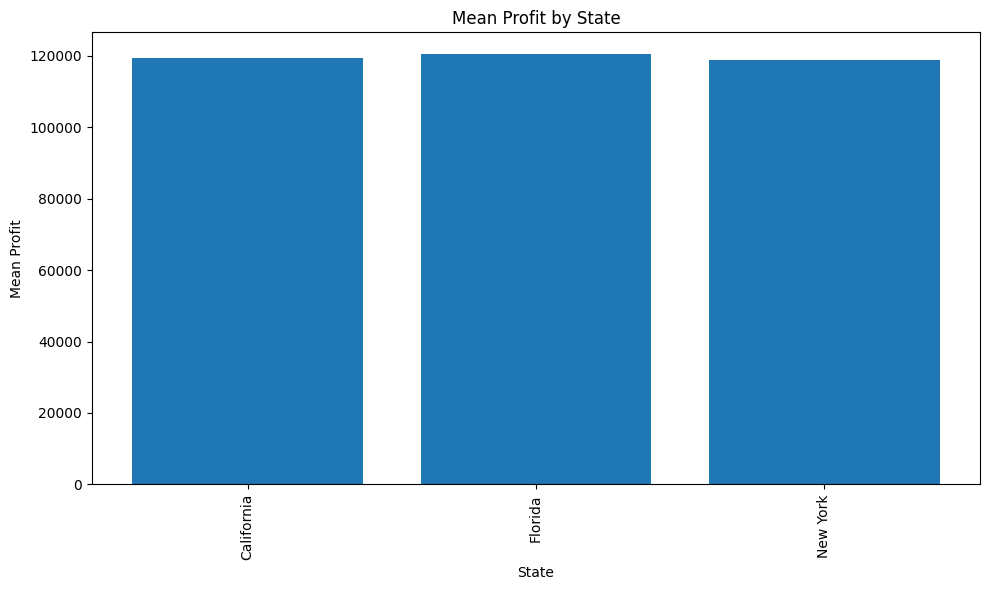

In [4]:
mean_profit_by_country = profit_data.groupby('State')['Profit'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_profit_by_country['State'], mean_profit_by_country['Profit'])
plt.xlabel('State')
plt.ylabel('Mean Profit')
plt.title('Mean Profit by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

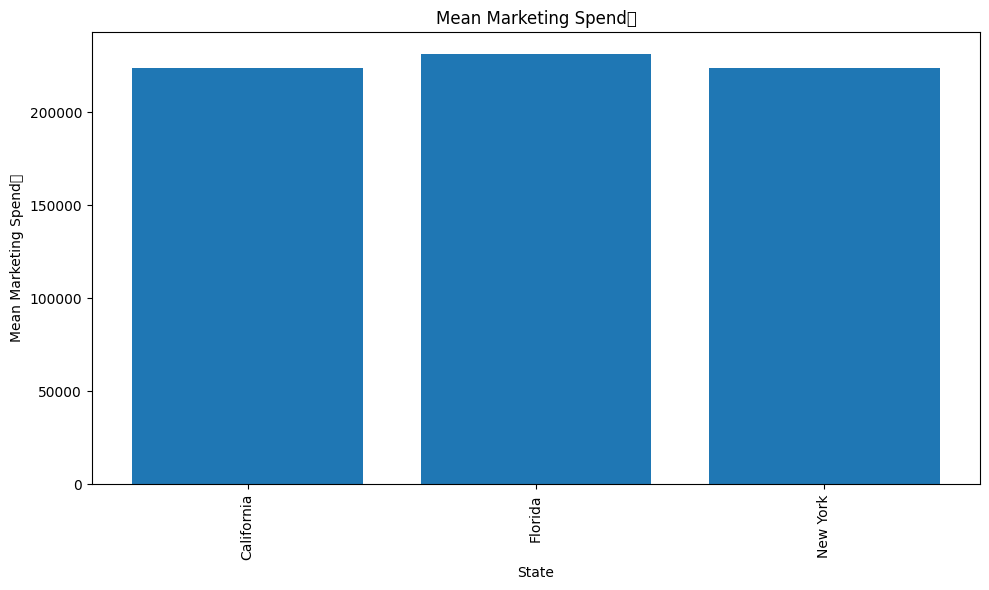

In [5]:
mean_profit_by_country = profit_data.groupby('State')['Marketing Spend'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_profit_by_country['State'], mean_profit_by_country['Marketing Spend'])
plt.xlabel('State')
plt.ylabel('Mean Marketing Spend	')
plt.title('Mean Marketing Spend	')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
profit_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
profit_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


## Data pre-processing

In [8]:
encoder = LabelEncoder()
profit_data['State'] = encoder.fit_transform(profit_data['State'])
profit_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


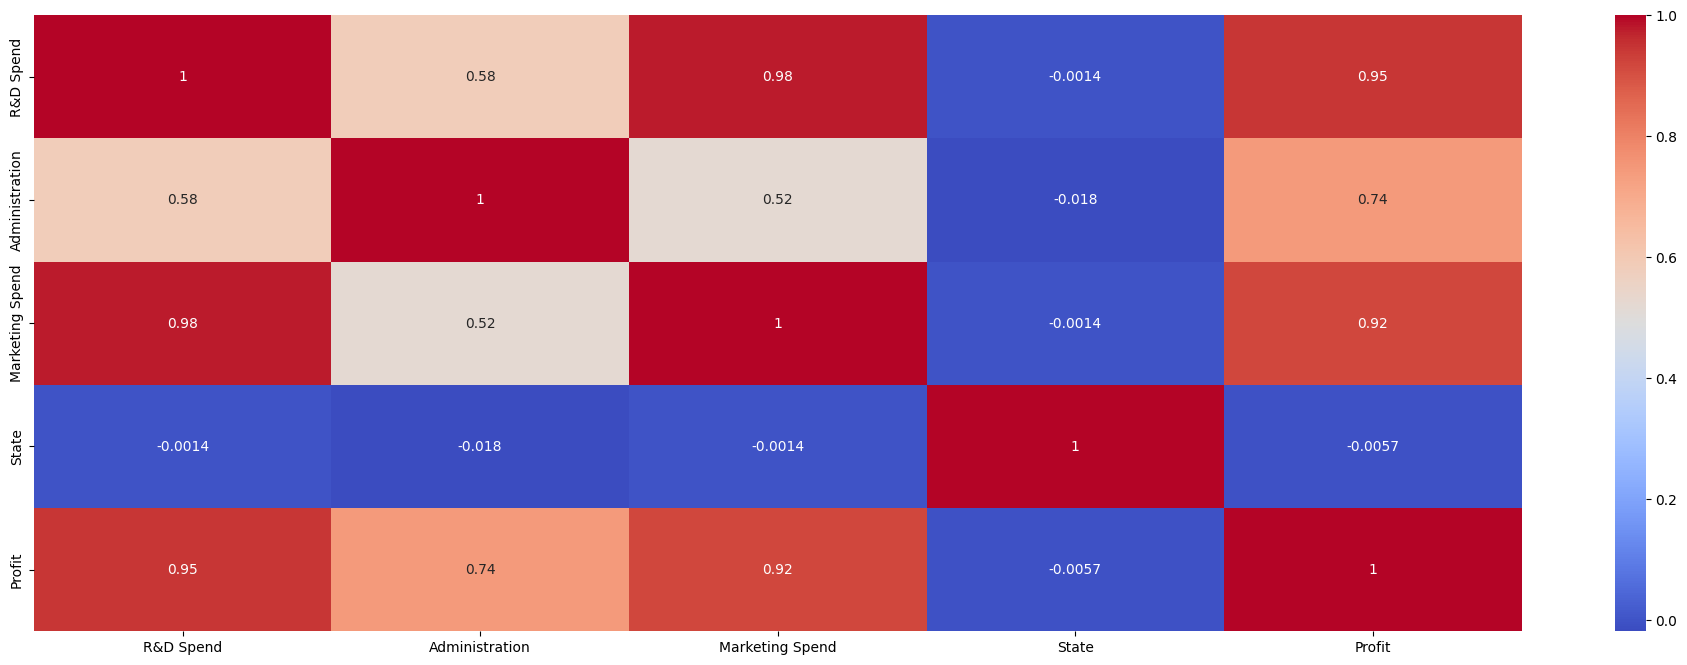

In [9]:
plt.figure(figsize=[24,8])
sns.heatmap(profit_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
inscaler = StandardScaler()
scaled_X = inscaler.fit_transform(profit_data.drop(columns=['Profit']))

outscaler = StandardScaler()
scaled_y = outscaler.fit_transform(profit_data[['Profit']])

## Data sampling

In [11]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,scaled_y,test_size=0.2)

## Model Training

In [12]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [13]:
rf_pred = model.predict(X_test)

In [14]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Mean squared error:",rf_mse)
print("R squared score:",rf_r2)

Mean squared error: 0.0010115334022078105
R squared score: 0.9986907472042265


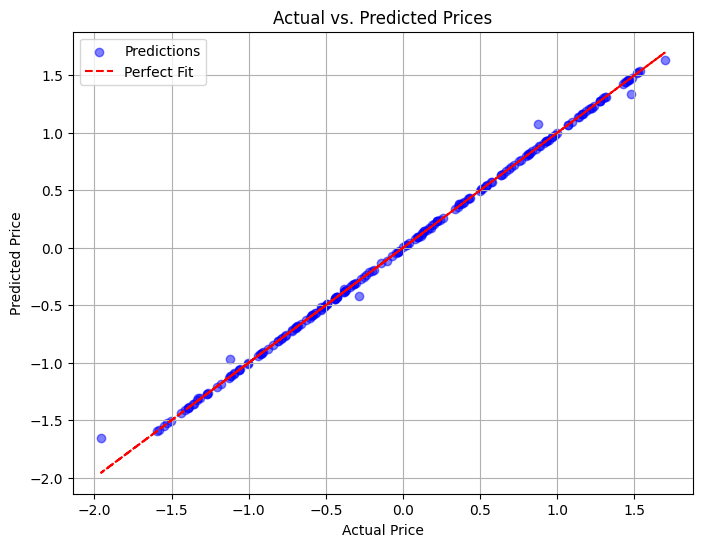

In [15]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Fit")  # Ideal Line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid()
plt.show()


In [16]:
pickle.dump(model,open("files/profit_prediction_model.pkl",'wb'))
pickle.dump(encoder,open("files/profit_prediction_Encoder.pkl",'wb'))
pickle.dump(inscaler,open("files/profit_prediction_inScaler.pkl",'wb'))
pickle.dump(outscaler,open("files/profit_prediction_outScaler.pkl",'wb'))

## Inference

In [17]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

def profit_prediction(RD_Spend, Administration, Marketing_Spend, State):
    # Load trained models and encoders
    model = pickle.load(open("files/profit_prediction_model.pkl", 'rb'))
    encoder = pickle.load(open("files/profit_prediction_Encoder.pkl", 'rb'))
    inscaler = pickle.load(open("files/profit_prediction_inScaler.pkl", 'rb'))
    outscaler = pickle.load(open("files/profit_prediction_outScaler.pkl", 'rb'))

    # # Encode categorical variable (State)
    state_encoded = encoder.transform([State])[0]

    # Convert input into NumPy array
    input_data = np.array([[RD_Spend, Administration, Marketing_Spend, state_encoded]])

    # Scale input data
    scaled_input = inscaler.transform(input_data)

    # Predict profit
    prediction = model.predict(scaled_input)

    # Inverse transform the prediction
    inverse_scaled_pred = outscaler.inverse_transform(prediction.reshape(-1, 1))  

    # Extract profit prediction
    profit_price = float(inverse_scaled_pred)#[0][0])  # Convert to float for safety

    # Create a dictionary for all attributes 
    attributes = {
        "R&D Spend": RD_Spend,
        "Administration": Administration,
        "Marketing Spend": Marketing_Spend,
        "State": state_encoded,
        "Profit Price": profit_price
    }

    # Create a bar plot (excluding State)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(attributes.keys()), y=list(attributes.values()), palette="viridis")

    # Annotate values on bars
    for index, value in enumerate(attributes.values()):
        plt.text(index, value + 0.05 * max(attributes.values()), f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

    # Add title and labels
    plt.xticks(rotation=20, ha='right', fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.title(f"Profit Prediction Analysis ({State})", fontsize=14, fontweight='bold')

    # Save the graph
    graph_path = "files/profit_prediction_result.png"
    plt.savefig(graph_path, bbox_inches="tight")
    plt.close()

    return f"Profit prediction: Rs {profit_price:.2f}", graph_path  

# Example usage
optimized_price, graph = profit_prediction(165349.20, 136897.800, 471784.1000, 'California')
print(optimized_price)  
print(f"Graph saved at: {graph}")  

Profit prediction: Rs 189481.77
Graph saved at: files/profit_prediction_result.png


In [18]:
optimized_price, graph = profit_prediction(19.20, 97.800, 784.100, 'New York')
print(optimized_price)  
print(f"Graph saved at: {graph}")  

Profit prediction: Rs 35513.57
Graph saved at: files/profit_prediction_result.png


In [19]:
optimized_price, graph = profit_prediction(4519.20, 987.800, 9784.100, 'Florida')
print(optimized_price)  
print(f"Graph saved at: {graph}")  

Profit prediction: Rs 51835.06
Graph saved at: files/profit_prediction_result.png
